In [9]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [10]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
#Normalise the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
# Create RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1027 - accuracy: 0.9687 - val_loss: 0.0767 - val_accuracy: 0.9751
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0782 - accuracy: 0.9765 - val_loss: 0.0919 - val_accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0618 - val_accuracy: 0.9807
Epoch 4/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0592 - val_accuracy: 0.9806
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0574 - val_accuracy: 0.9820
Epoch 6/10
469/469 [==============================] - 40s 86ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0530 - val_accuracy: 0.9824
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0499 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0643 - accuracy: 0.9793
Test accuracy: 0.9793000221252441


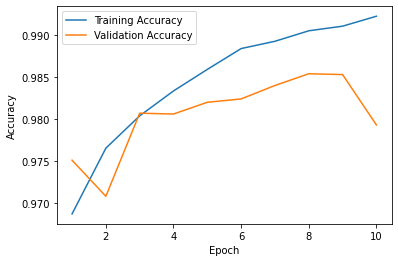

In [18]:
# Plot Validation and training Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(1, 11)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()